In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_2018 = pd.read_csv("/content/drive/My Drive/ground_water_quality_2018_post.csv")
df_2019 = pd.read_csv("/content/drive/My Drive/ground_water_quality_2019_post.csv")
df_2020 = pd.read_csv("/content/drive/My Drive/ground_water_quality_2020_post.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2018.head(5)

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [ ]:
df_2018 = df_2018.fillna(df_2018.bfill())

In [ ]:
columns_name_mapping = {'CO_-2 ': 'CO3', 'HCO_ - ': 'HCO3', 'Cl -': 'Cl', 'F -':'F', 'NO3- ':'NO3 ', 'SO4-2':'SO4', 'Na+':'Na', 'K+':'K', 'Ca+2':'Ca', 'Mg+2':'Mg'}
df_2019.rename(columns = columns_name_mapping, inplace = True)
print("\nAfter modifying first column:\n", df_2019.columns)


After modifying first column:
 Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L',
       'Classification.1'],
      dtype='object')


In [ ]:
df_2020.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [ ]:
df_2020.drop(['Unnamed: 8'], axis = 1, inplace = True )

In [ ]:
df_2019['district'].value_counts()

NALGONDA             30
NIZAMABAD            23
KAMAREDDY            20
MEDAK                19
RANGAREDDY           18
VIKARABAD            16
KHAMMAM              15
YADADRI              15
JAGITYAL             14
BHADRADRI            14
NAGARKURNOOL         12
JOGULAMBA(GADWAL)    11
SANGAREDDY           11
NIRMAL               11
MAHABUBNAGAR         11
WARANGAL (R)         11
NARAYANPET           10
ADILABAD              9
MAHABUBABAD           8
HYDERABAD             8
MEDCHAL               7
JANGAON               7
SIDDIPET              7
SURYAPET              7
WANAPARTHY            7
WARANGAL (U)          7
MANCHERIAL            6
KUMURAM BHEEM         6
SIRCILLA              6
PEDDAPALLY            5
KARIMNAGAR            5
BHUPALPALLY           4
MULUGU                4
Name: district, dtype: int64

In [ ]:
missing2019 = df_2019[df_2019['CO3'].isnull()]
missing2019['district'].value_counts()

NIZAMABAD            23
NALGONDA             22
KAMAREDDY            20
VIKARABAD            16
KHAMMAM              15
BHADRADRI            10
MAHABUBNAGAR          8
HYDERABAD             7
JOGULAMBA(GADWAL)     7
NARAYANPET            7
SANGAREDDY            7
SIDDIPET              7
MEDCHAL               6
SURYAPET              5
Name: district, dtype: int64

In [ ]:
correl_2019 = df_2019.corr()
print(correl_2019['CO3'].sort_values(ascending = False), '\n')

CO3              1.000000
pH               0.596815
F                0.424420
RSC  meq  / L    0.353110
SAR              0.259049
Na               0.119754
long_gis         0.068007
K               -0.010352
NO3             -0.048645
HCO3            -0.053387
EC              -0.060474
TDS             -0.060474
sno             -0.091990
Cl              -0.114709
SO4             -0.130743
gwl             -0.134728
Mg              -0.146273
lat_gis         -0.259054
T.H             -0.265858
Ca              -0.268697
Name: CO3, dtype: float64 



<ipython-input-116-6433aa2e9e4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_2019 = df_2019.corr()


<ipython-input-117-5b20e7f15e90>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_2019 = df_2019.corr()


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

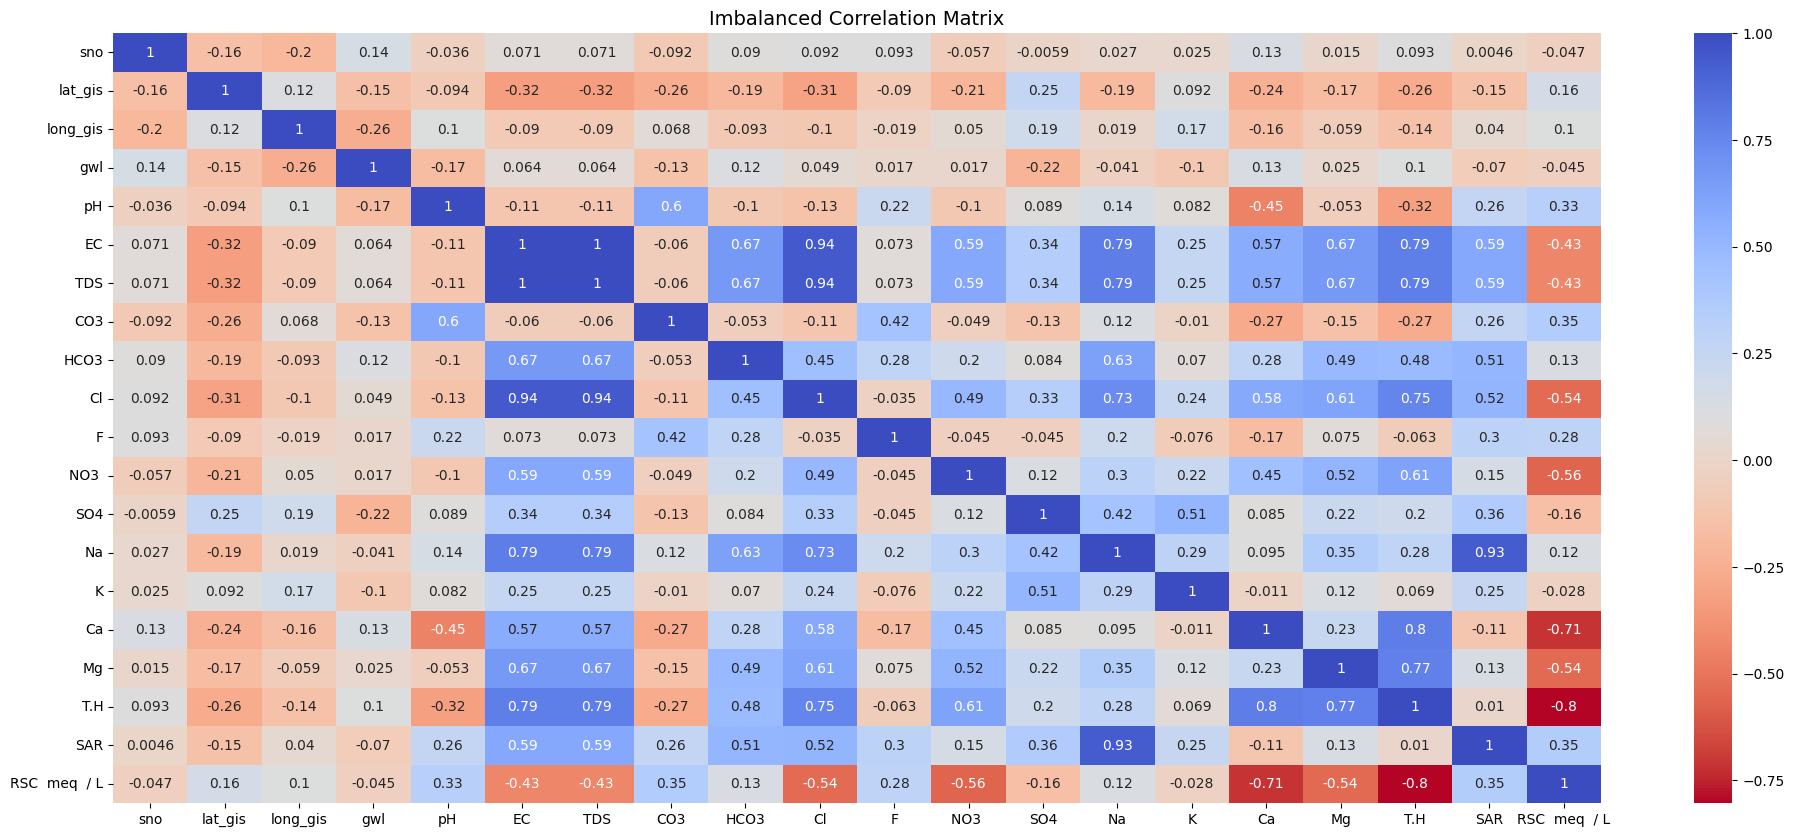

In [ ]:
correl_2019 = df_2019.corr()
f, ax1 = plt.subplots(figsize = (24,10))
sns.heatmap(correl_2019, cmap ='coolwarm_r',annot=True, ax =ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

In [ ]:
df_2019.rename(columns = {'EC':'E.C'}, inplace = True)
water_q = pd.concat([df_2018, df_2019, df_2020])

<ipython-input-119-b9f11bcbdfcf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=water_q.corr()


<Axes: >

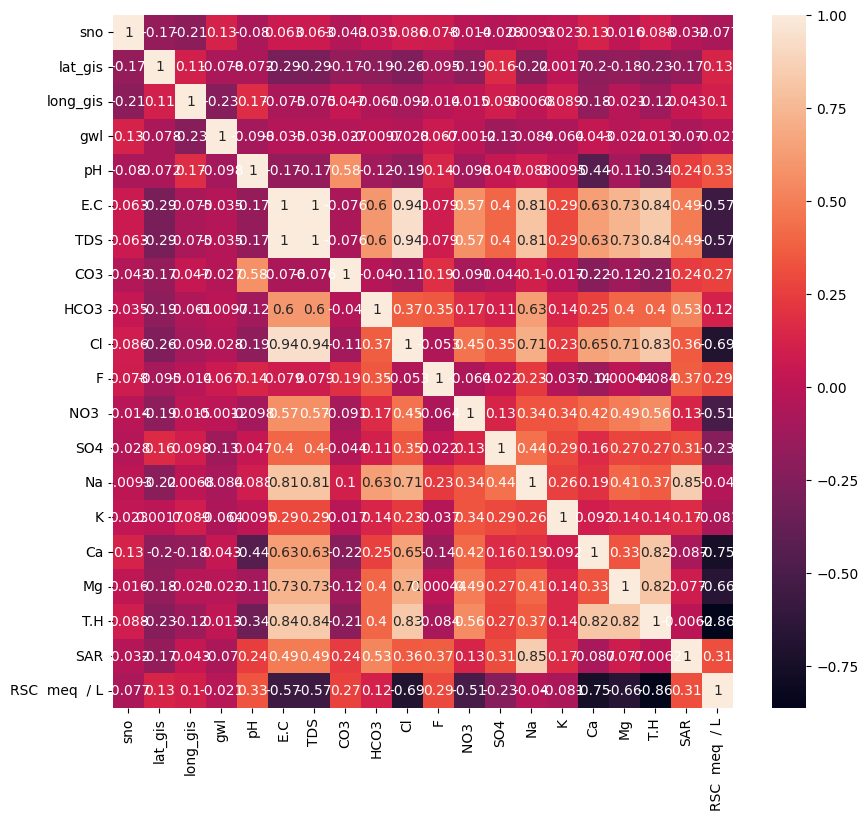

In [ ]:
water_q.loc[261,'pH']=8.05
water_q['pH']=water_q.loc[:,'pH'].astype(float)

correl=water_q.corr()
plt.figure(figsize=(10,9))
sns.heatmap(correl,annot=True)

In [ ]:
#CO3 is only moderately correlated with only pH values within data 0.6, complete data 0.58
#Imputing missing values using a correlated feature as a predictor involves using the correlated feature to predict
#the missing values in the column with missing data.
#This can be achieved through a simple linear regression model or any other appropriate imputation technique that leverages the relationship
#between the correlated features.

#Using Linear Regression

In [ ]:
df_missing = df_2019[['pH', 'CO3']]
df_subset = df_missing.dropna(subset =['pH', 'CO3'])

In [ ]:
df_missing.columns

Index(['pH', 'CO3'], dtype='object')

In [ ]:
X_train = df_subset['pH'].values.reshape(-1,1)
y_train = df_subset['CO3'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Extracting a subset of data from a DataFrame df_missing where the 'CO3' column has missing values. Specifically, you're selecting
#the 'pH' values for rows where the 'CO3' value is missing, and then reshaping the extracted values into a 2D array using the reshape function.

In [ ]:
X_missing_values = df_missing.loc[df_missing['CO3'].isnull(), 'pH'].values.reshape(-1,1)
X_missing_values.shape

(160, 1)

In [ ]:
predicted_missing_values = model.predict(X_missing_values)

In [ ]:
## Update the missing values in the original dataset with the predicted values
df_missing.loc[df_missing['CO3'].isnull(), 'CO3'] = predicted_missing_values

<ipython-input-128-7fc65c06f5f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing.loc[df_missing['CO3'].isnull(), 'CO3'] = predicted_missing_values


In [ ]:
##putting predicted CO3 values in data2019
df_2019['CO3'] = df_missing['CO3']

In [ ]:
df_2019.isna().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 5
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [ ]:
df_2018['gwl'] = df_2018['gwl'].fillna(df_2018['gwl'].mean())
df_2020['gwl'] = df_2020['gwl'].fillna(df_2020['gwl'].mean())
df_2019['gwl'] = df_2019['gwl'].fillna(df_2019['gwl'].mean())

In [ ]:
water_q = pd.concat([df_2018, df_2019, df_2020])

In [ ]:
water_q.loc[261, 'pH'] =8.05
water_q['pH'] = water_q.loc[:,'pH'].astype(float)

<ipython-input-134-b2e927359aaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor =water_q.corr()


<Axes: >

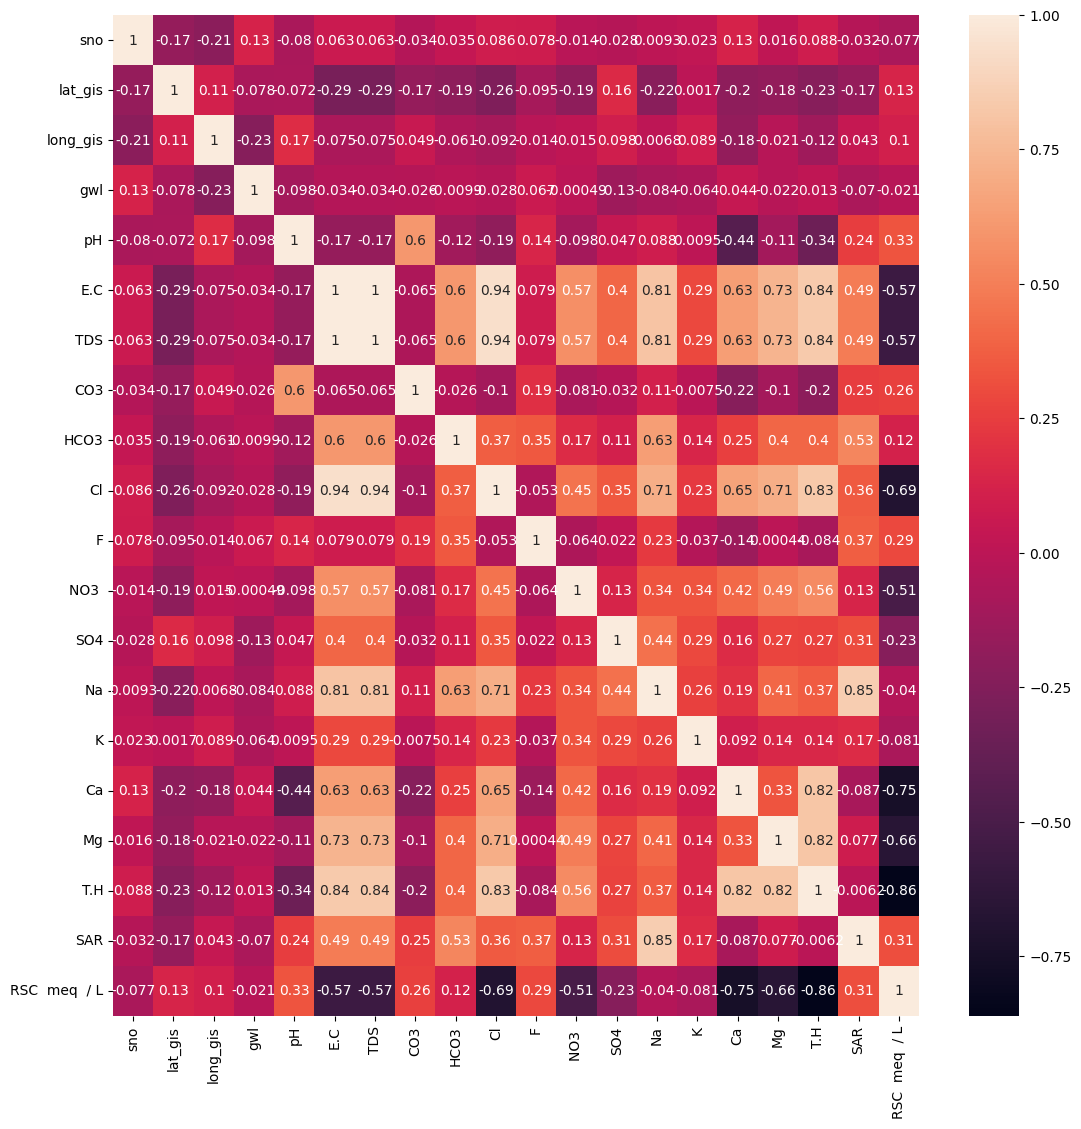

In [ ]:
cor =water_q.corr()
plt.figure(figsize =(13,13))
sns.heatmap(cor, annot = True)

In [ ]:
#pie charts.
#According Standards there are limits to what extent the chemical level in water is safe
#By pie charts lets find out, of all the samples how much % of water samples are safe

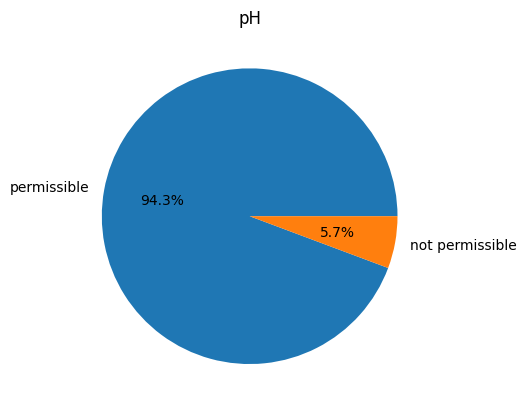

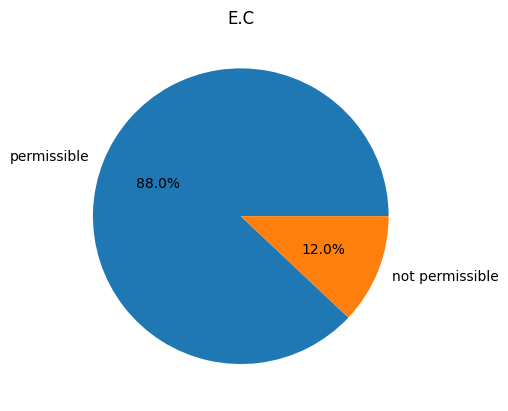

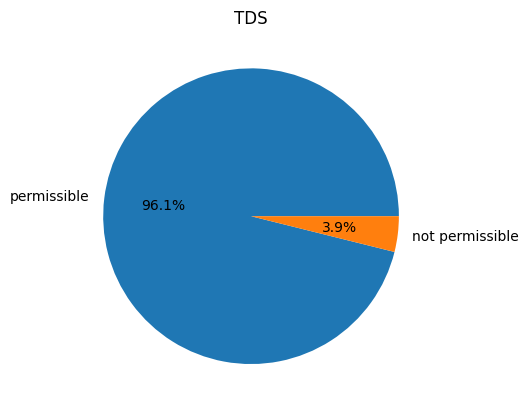

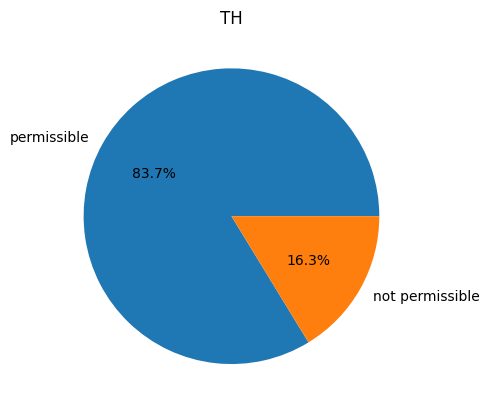

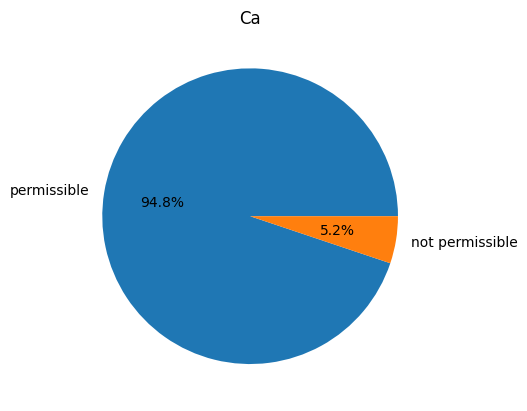

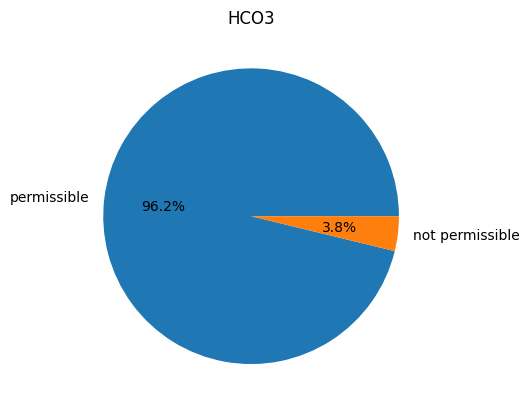

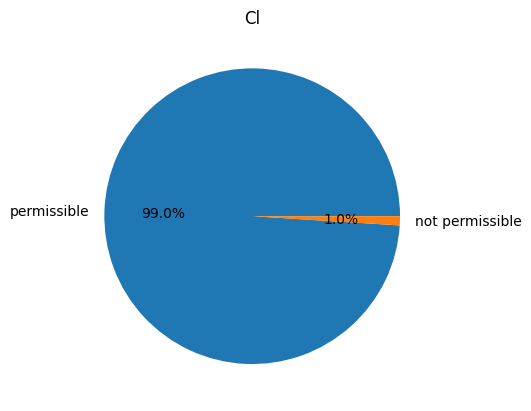

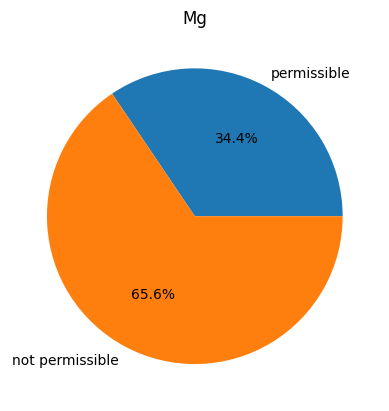

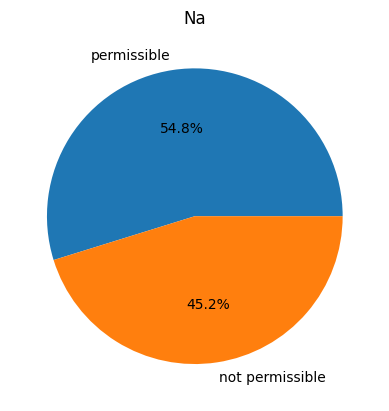

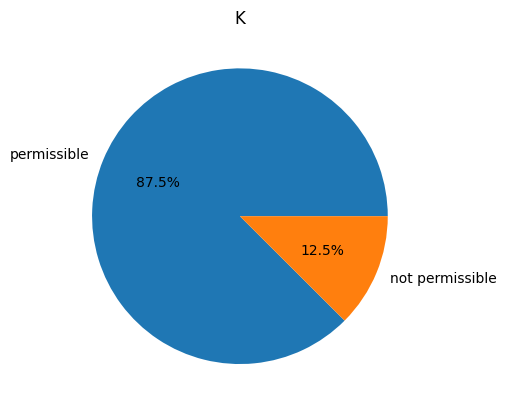

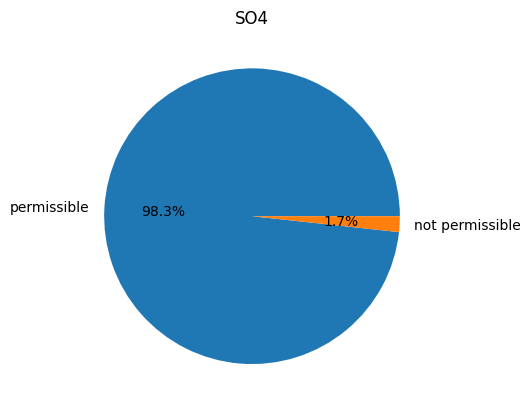

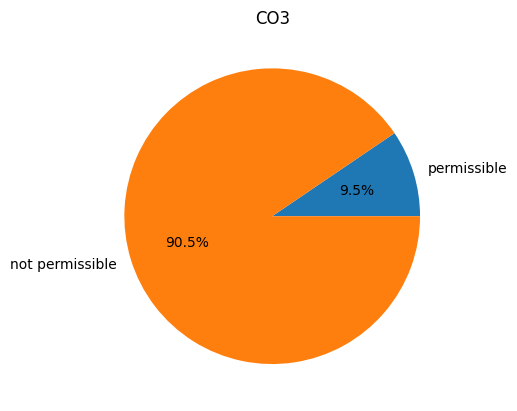

In [ ]:
def counting(column,ll,ul):
    """ll- lower limit, ul- upper limit"""
    c=0
    c1=0
    for i in column:
        if i>ll and i<ul:
            c=c+1
        else:
             c1=c1+1
    return c,c1

def plotting(l,tit):
    N=["permissible","not permissible"]
    plt.pie(l,labels=N,autopct="%0.1f%%")
    plt.title(tit)
    plt.show()

l=counting(water_q["pH"],6,8.5)
plotting(l,"pH")
l1=counting(water_q["E.C"],500,3000)
plotting(l1,"E.C")
l2=counting(water_q["TDS"],0,2000)
plotting(l2,"TDS")
l3=counting(water_q["T.H"],0,600)
plotting(l3,"TH")
l4=counting(water_q["Ca"],0,200)
plotting(l4,"Ca")
l5=counting(water_q["HCO3"],100,800)
plotting(l5,"HCO3")
l6=counting(water_q["Cl"],0,1000)
plotting(l6,"Cl")
l7=counting(water_q['Mg'],1,30)
plotting(l7,"Mg")
l8=counting(water_q['Na'],0,100)
plotting(l8,"Na")
l9=counting(water_q['K'],0,12)
plotting(l9,"K")
l10=counting(water_q['SO4'],0,200)
plotting(l10,"SO4")
l11=counting(water_q['CO3'],1.32,17.60)
plotting(l11,"CO3")
plt.show()


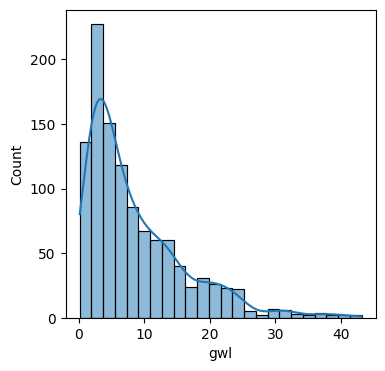

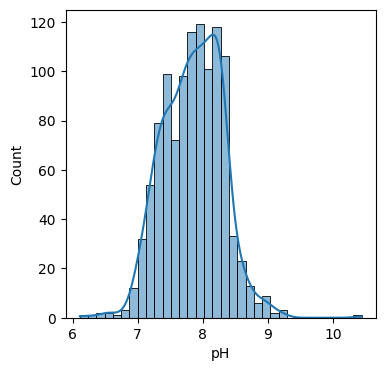

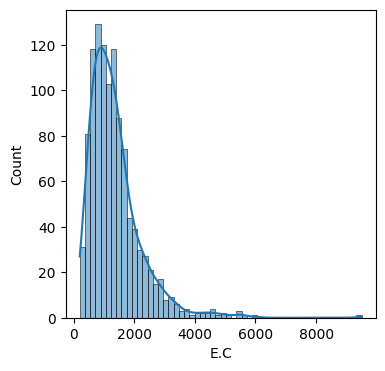

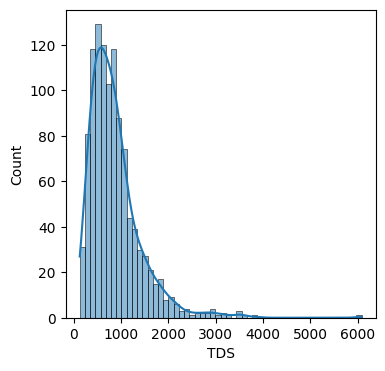

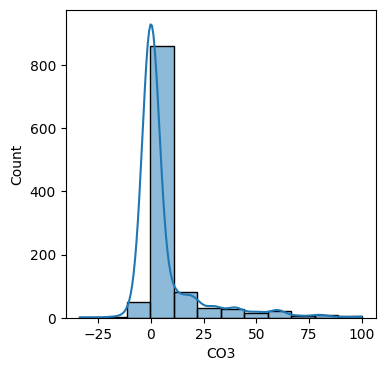

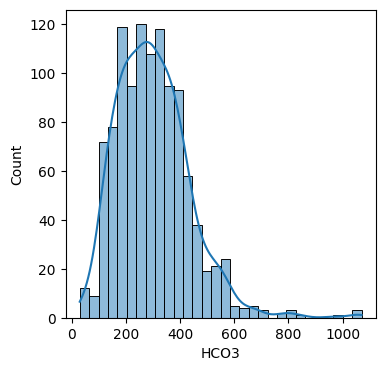

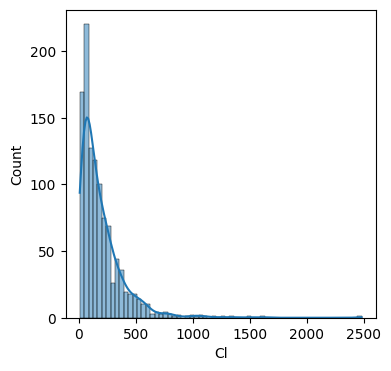

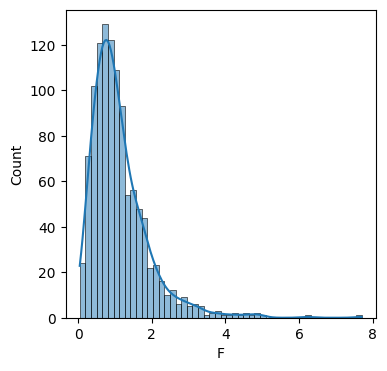

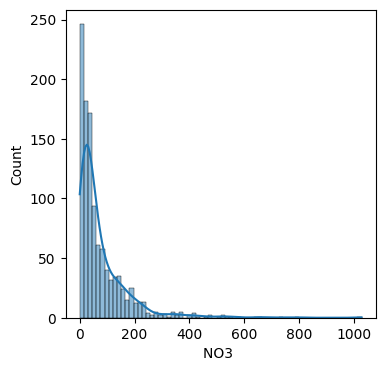

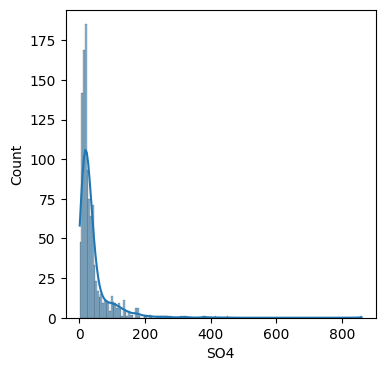

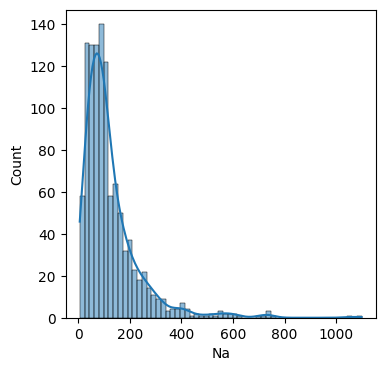

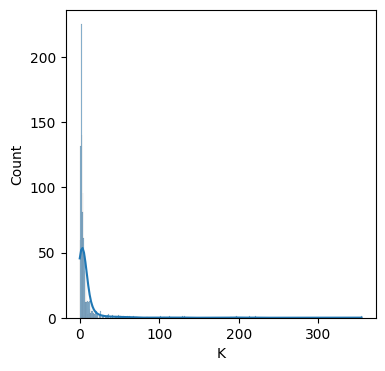

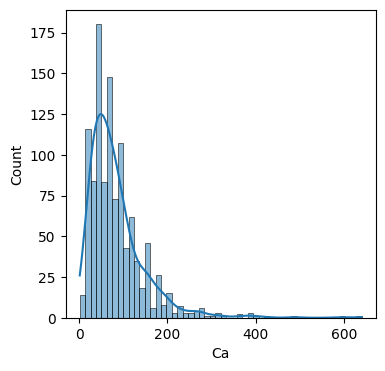

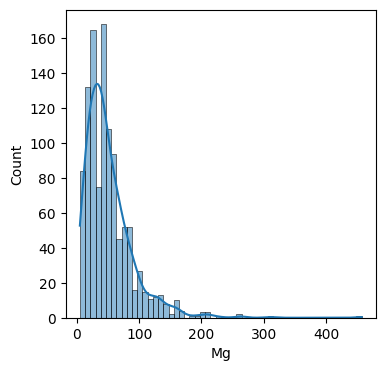

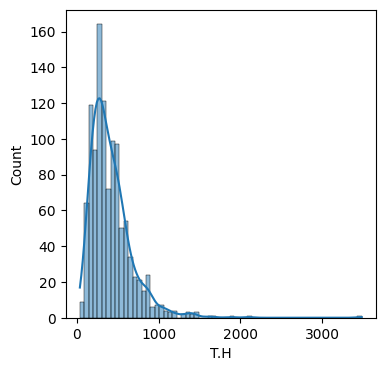

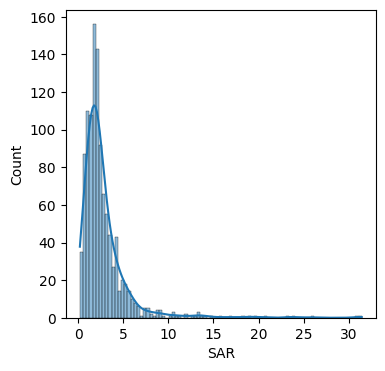

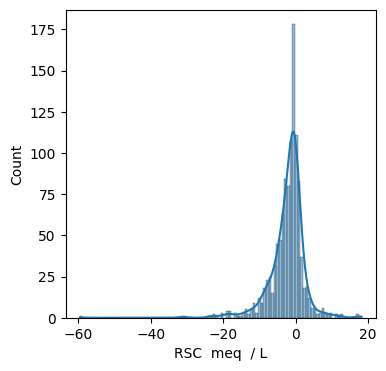

In [ ]:
clm_tovo = ['gwl','pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']
for i in clm_tovo:
  plt.figure(figsize = (4,4))
  sns.histplot(water_q[i], kde = True)
  plt.show()

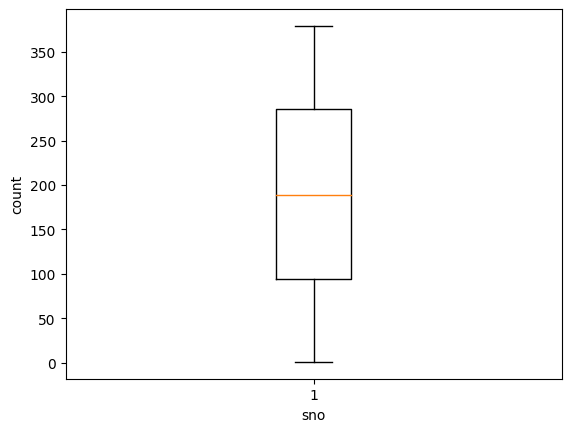

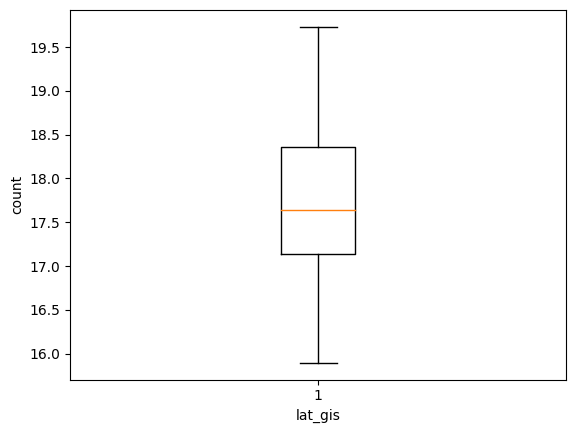

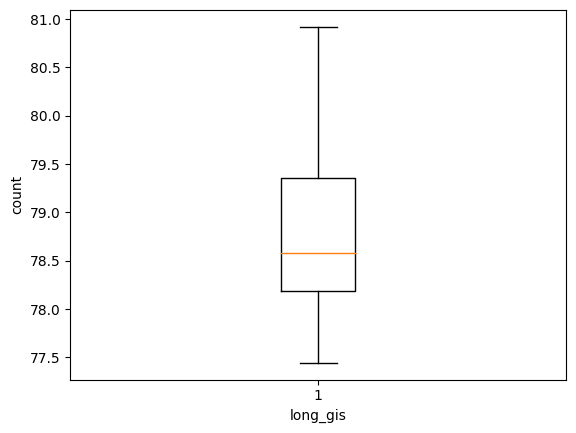

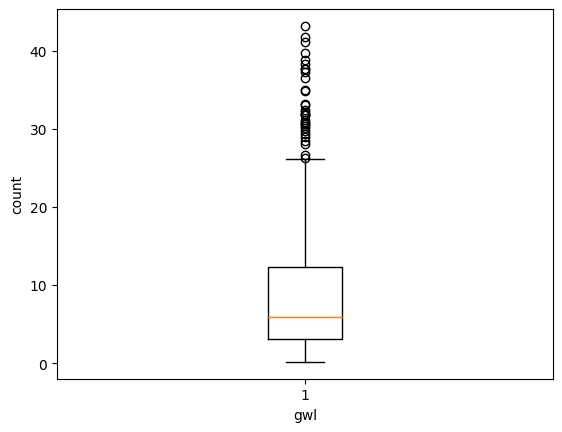

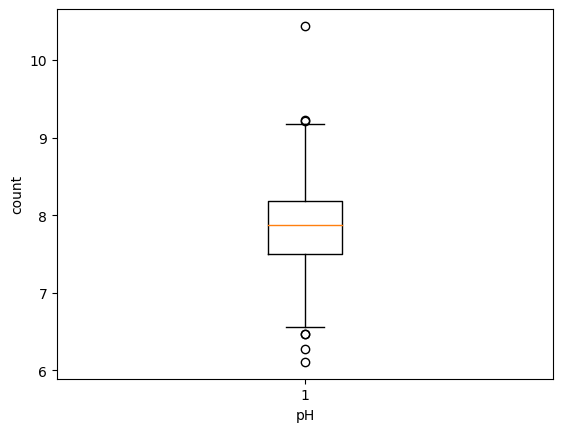

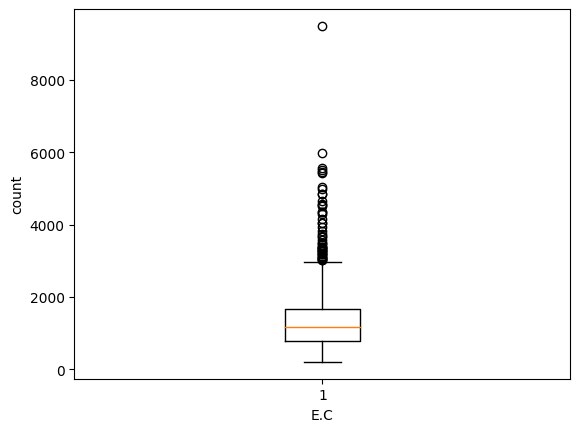

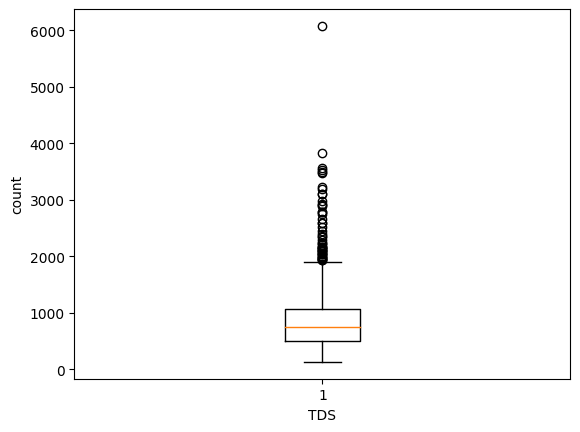

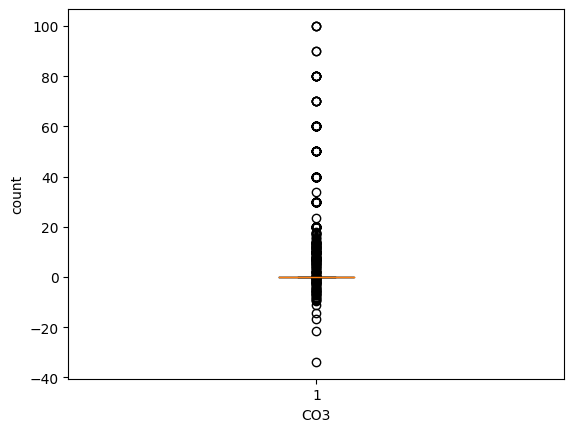

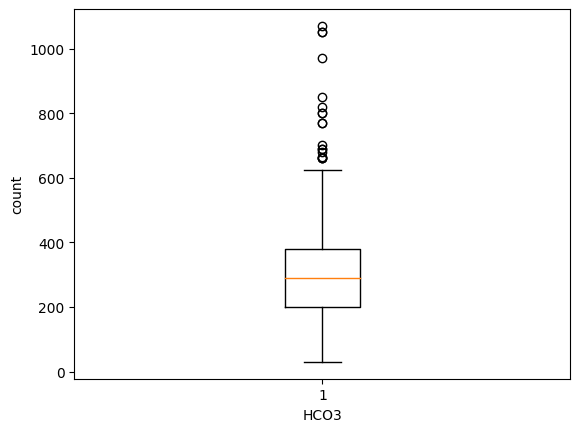

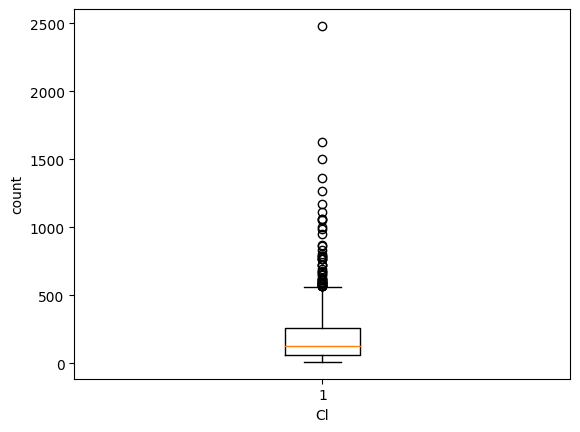

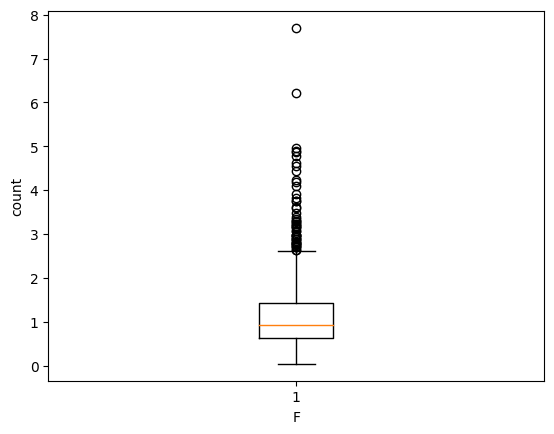

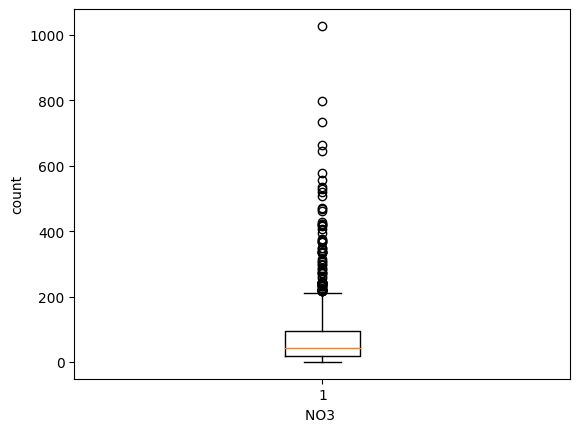

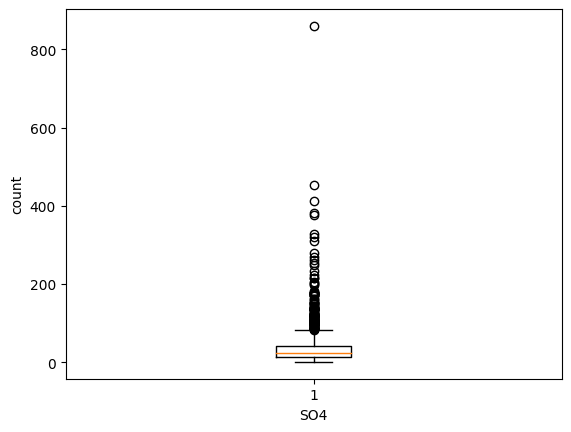

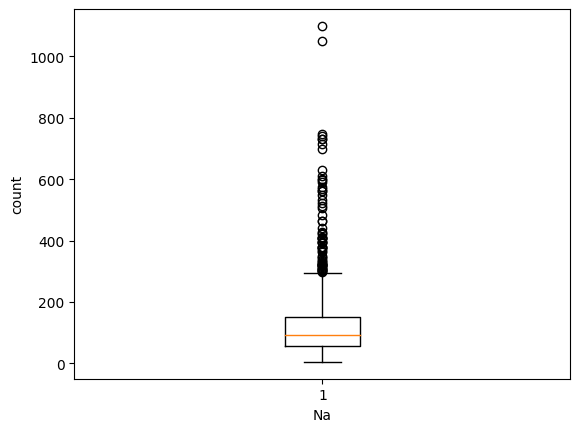

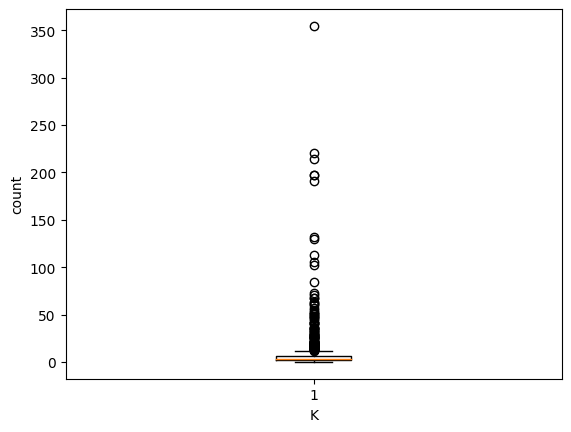

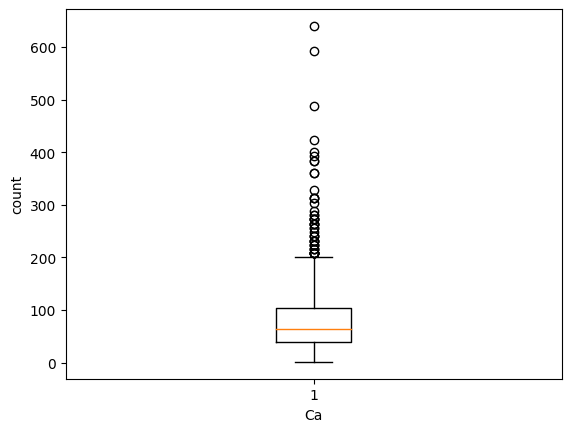

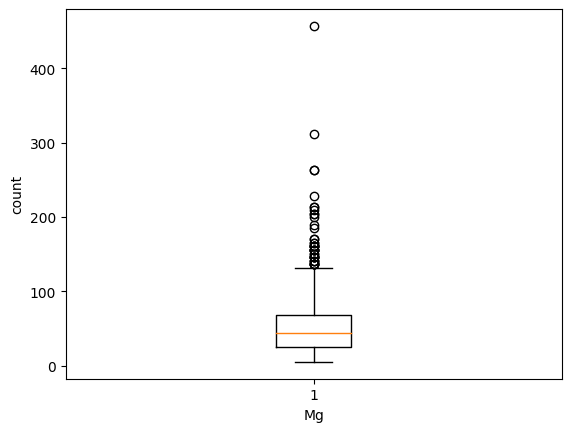

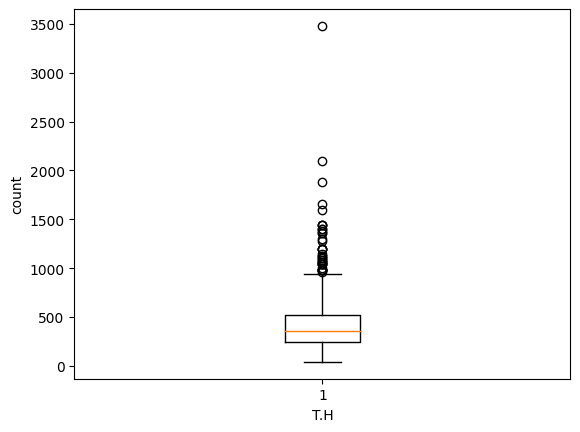

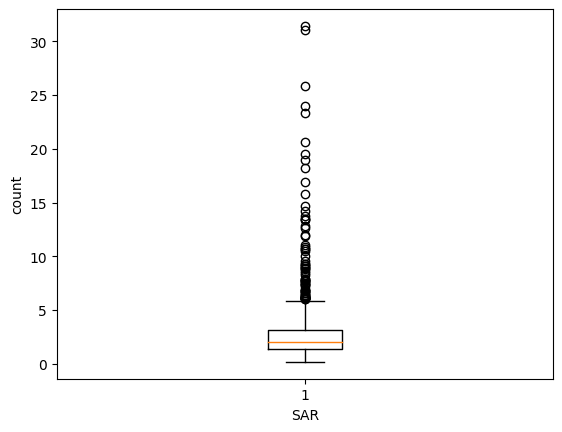

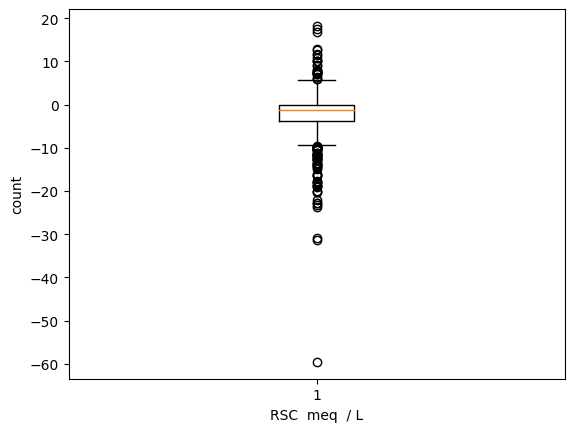

In [ ]:
col = water_q.columns
for col_name in col:
    if(water_q[col_name].dtypes=='int64' or water_q[col_name].dtypes=='float64'):
        plt.boxplot(water_q[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
columns_to_drop =['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'season','RSC  meq  / L','Classification.1']
Water_q = water_q.drop(columns=columns_to_drop)

In [ ]:
Water_q.head(5)

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2


In [ ]:
#2.Normalisation, Dimentionality Reduction

In [ ]:
##Check the distribution of 'classification'
Water_q['Classification'].value_counts()

C3S1    696
C2S1    248
C4S1     87
C4S2     36
C3S2     12
C4S4      7
C3S3      6
C4S3      5
C1S1      3
OG        2
O.G       2
C3S4      1
C2S2      1
Name: Classification, dtype: int64

In [ ]:
#The distribution is uneven. So need to Use stratified method for tarining and testing. O.G and OG are not defined will remove them.
#C3S4 and C2S2 are only 1 which caused lot of error under Stratified method. For now remove them too

In [ ]:
Water_q = Water_q[~Water_q['Classification'].isin(['C3S4', 'C2S2', 'O.G', 'OG'])]

In [ ]:
X = Water_q.drop(['Classification'], axis =1)
Y =Water_q['Classification']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.7,stratify=Y, random_state=42)

In [ ]:
#Normalising the data, as for dimentionality reduction we need normalised data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.fit_transform(x_test)

In [ ]:
X_train_normalized.shape

(770, 16)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca =PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.fit_transform(X_test_normalized)


In [ ]:
X_train_pca.shape

(770, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.39890833, 0.1710992 , 0.08412929, 0.07110982, 0.06277294,
       0.05329367, 0.04501269, 0.04159245, 0.02891441, 0.02028342,
       0.01851058, 0.00368484])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9993116601911453

In [ ]:
#Model Training
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train_encode = encode.fit_transform(y_train)
y_test_encode = encode.fit_transform(y_test)

In [ ]:
y_train.shape

(770,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
models=[xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8),
        RandomForestClassifier(n_estimators=50,random_state=42)]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
num_folds =5
skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state =42)

In [ ]:
models=[xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8),
        RandomForestClassifier(n_estimators=50,random_state=42)]

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and evaluate models

def model_evaluation(model):


    fold_accuracies = []
    models = []

    for fold, (train_index, val_index) in enumerate(skf.split(X_train_pca, y_train_encode)):
        X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
        y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]


        model = model  # Replace with your chosen model and set the appropriate hyperparameters
        model.fit(X_train_fold, y_train_fold)

    # Add the trained model to the list for later evaluation
        models.append(model)

    # Step 6: Make predictions on the current fold's validation data
        y_pred_fold = model.predict(X_val_fold)

    # Step 7: Calculate accuracy for the current fold
        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        fold_accuracies.append(accuracy)
        print(f"Fold {fold+1} - Accuracy: {accuracy:.4f}")

# Calculate and print the mean accuracy and standard deviation across all folds
    mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"\nMean Cross-Validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

In [ ]:
for i in models:
  model_evaluation(i)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fold 1 - Accuracy: 0.8896
Fold 2 - Accuracy: 0.9091
Fold 3 - Accuracy: 0.8961
Fold 4 - Accuracy: 0.9221
Fold 5 - Accuracy: 0.9156

Mean Cross-Validation Accuracy: 0.9065 ± 0.0120
Fold 1 - Accuracy: 0.8896


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fold 2 - Accuracy: 0.9221
Fold 3 - Accuracy: 0.8961
Fold 4 - Accuracy: 0.8961
Fold 5 - Accuracy: 0.8961

Mean Cross-Validation Accuracy: 0.9000 ± 0.0113


In [ ]:
#best model = XGBoost
best_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)  # Replace with the selected best model
best_model.fit(X_train_pca, y_train_encode)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_test_pred =best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test_encode, y_test_pred)

In [ ]:
print(f"\nFinal Model - Test Accuracy: {test_accuracy:.4f}")


Final Model - Test Accuracy: 0.8758


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=24, input_dim = 12,activation='relu'))   # input of 29 columns as shown above
# hidden layer
model.add(Dense(units=48,activation='relu'))
#Adding Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(48,activation='relu'))
model.add(Dense(48,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(10,activation='sigmoid'))                        # binary classification fraudulent or not

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,841
Trainable params: 1,841
Non-trainabl

In [ ]:
import pickle

with open('WaterQualityClassification.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
encoded_classes = encode.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"Class Label: {class_label} - Encoded Value: {i}")

Class Label: C1S1 - Encoded Value: 0
Class Label: C2S1 - Encoded Value: 1
Class Label: C3S1 - Encoded Value: 2
Class Label: C3S2 - Encoded Value: 3
Class Label: C3S3 - Encoded Value: 4
Class Label: C4S1 - Encoded Value: 5
Class Label: C4S2 - Encoded Value: 6
Class Label: C4S3 - Encoded Value: 7
Class Label: C4S4 - Encoded Value: 8


In [ ]:
def prediction(data):
    with open('WaterQualityClassification.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    new_data=np.array(data)
    new_data_normalised=scaler.transform(new_data.reshape(1,-1))
    new_data_pca=pca.transform(new_data_normalised)
    predicted_class = loaded_model.predict(new_data_pca)

    encoded_class=predicted_class
    original_class=encode.inverse_transform(encoded_class)

    Class_Description={'C1S1':"Low salinity and low sodium waters are good for irrigation and can be used with most crops with no restriction on use on most of the soils. ",
                   'C2S1':"Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. ",
                   'C3S1':"The high salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.",
                  'C3S2':"The high salinity and medium sodium waters require good drainage and can be used on coarse - textured or organic soils having good permeability. ",
                  'C3S3':"These high salinity and high sodium waters require special soil management, good drainage, high leaching and organic matter additions. Gypsum amendments make feasible the use of these waters. ",
                  'C4S1':"Very high salinity and low sodium waters are not suitable for irrigation unless the soil must be permeable and drainage must be adequate. Irrigation waters must be applied in excess to provide considerable leaching. Salt tolerant crops must be selected. ",
                  'C4S2':"Very high salinity and medium sodium waters are not suitable for irrigation on fine textured soils and low leaching conditions and can be used for irrigation on coarse textured or organic soils having good permeability. ",
                  'C4S3':"Very high salinity and high sodium waters produce harmful levels of exchangeable sodium in most soils and will require special soil management, good drainage, high leaching, and organic matter additions. The Gypsum amendment makes feasible the use of these waters. ",
                  'C4S4':"Very high salinity and very high sodium waters are generally unsuitable for irrigation purposes. These are sodium chloride types of water and can cause sodium hazards. It can be used on coarse-textured soils with very good drainage for very high salt tolerant crops. Gypsum amendments make feasible the use of these waters. "
                  }

    if original_class[0] in Class_Description:
        print(original_class[0]+" "+Class_Description[original_class[0]])

In [ ]:
test_data=[5.66,8.02,420,275.3,0.0,153.3,12,0.55,11.200,37,25,1.0,33.0,20.5,160.3,0.938]
prediction(test_data)

C2S1 Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
